# Phase 4 Project: Movie Recommendation System
---
<div>
<img src="images/Phase_4_Project.png" width="400">
</div>

---

### Project Team: Group 2
- **Rose Kyalo**
- **Angel Linah Atungire**
- **Oscar Mulei**

#### Overview
In the dynamic and rapidly evolving digital marketplace, recommendation systems play a pivotal role. They efficiently bridge the gap between users and a diverse array of products by analyzing user behaviors and preferences. These systems are integral in enhancing the shopping experience, providing personalized suggestions, and aiding sellers in effectively meeting customer requirements. This results in significant improvements in sales and customer satisfaction.

#### Business Understanding
The objective of this project is to develop a sophisticated movie recommendation system. This system will recommend the top five films based on user ratings. Employing collaborative filtering techniques, the system will analyze user preferences to offer tailored recommendations. The primary aim is to establish a recommender system, an artificial intelligence subset, designed to predict user preferences and suggest movies that align with these preferences. Collaborative filtering will be the key technique employed to ascertain user preferences accurately.

#### Business Problem
Company A, a leader in the movie production industry, is focused on optimizing its promotional strategies for its diverse film portfolio. The company has sought our expertise in engineering a robust movie recommendation system. This system is intended to deliver bespoke movie suggestions to its audience, thereby augmenting user engagement and supporting successful promotional campaigns.

#### Objective
The principal objective of this system is to analyze and understand user behaviors and preferences through their movie rating history. With this insight, the system will strive to:

1. **Precision in Recommendations:** Develop an algorithm capable of accurately identifying and suggesting the top five movies based on user ratings. These recommendations should closely align with the individual preferences of each user.

2. **Enhancement of User Engagement:** Create a recommendation system that significantly boosts user engagement. This will be achieved by delivering personalized movie suggestions, thereby increasing user interaction and the duration of user engagement on the platform.

3. **Generation of Personalized Recommendations:** Formulate recommendations that are specifically tailored to align with each user's distinct interests.

#### Data Source

The data for this project will be sourced from the GroupLens Research Project, specifically the MovieLens dataset, available at [GroupLens](https://grouplens.org/datasets/movielens/latest/). This comprehensive dataset includes:

- User ratings: A collection of movie ratings provided by users, which is the cornerstone of our collaborative filtering model.
- Movie details: Information on various movies, including genres, release dates, and more, which aids in understanding the context of user preferences.
- Links: References to other databases, which could be useful for enriching our dataset with additional movie information.
- Tags: User-generated tags for movies, offering insights into the nuanced preferences of users.


#### Movie Recommendation System Development Steps

1. **Data Collection & Preprocessing**
    - Acquire and clean the MovieLens dataset.
    - Address inconsistencies, anomalies, and missing values.

2. **Exploratory Data Analysis (EDA)**
    - Conduct statistical and visual analysis to identify patterns and trends.

3. **Model Development: Building the Recommendation System**
    - **3.1: Content-Based Recommendation System Focused on Movie title**
    - **3.2: Content-Based Recommendation System Focused on Movie Genres**

4. **Model Development: Interactive Recommendation Widget**
    - To enhance user engagement and provide a user-friendly interface, we will create an interactive recommendation widget. Users can enter a movie title, and the widget will display recommended movies based on their preferences.

5. **Model Evaluation & Refinement**
    - Assess the model using accuracy, precision, and recall.

---
### Data Collection and Preprocessing

In [1]:
# Imported Libraries: Imported necessary Python libraries for data manipulation, analysis, and visualization.

import pandas as pd           # Library for data manipulation and analysis
import numpy as np            # Library for numerical computations
import matplotlib.pyplot as plt  # Library for creating data visualizations
import seaborn as sns         # Data visualization library built on top of Matplotlib
import scipy.stats as stats   # Library for statistical analysis
import sklearn                # Library for machine learning and data mining
from sklearn.feature_extraction.text import TfidfVectorizer  # Text vectorization for NLP tasks
from sklearn.metrics.pairwise import cosine_similarity       # Calculating cosine similarity between vectors
import ipywidgets as widgets  # Library for creating interactive widgets in Jupyter notebooks
from IPython.display import display  # Displaying interactive widgets in Jupyter notebooks
import warnings               # Library for handling warnings

# Suppress warnings from TfidfVectorizer about the 'token_pattern' parameter
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

In [2]:
# Data Loading: Loaded four datasets into DataFrames: links.csv, tags.csv, ratings.csv, and movies.csv.

links = pd.read_csv("Data/links.csv")
tags = pd.read_csv("Data/tags.csv")
ratings = pd.read_csv("Data/ratings.csv") # Dataset used to build the recommendation system
movies = pd.read_csv("Data/movies.csv") # # Dataset used to build the movies search engine 

# Display the first few rows of each dataframe to understand their structure
(links.head(), tags.head(), ratings.head(), movies.head())

(   movieId  imdbId   tmdbId
 0        1  114709    862.0
 1        2  113497   8844.0
 2        3  113228  15602.0
 3        4  114885  31357.0
 4        5  113041  11862.0,
    userId  movieId              tag   timestamp
 0       2    60756            funny  1445714994
 1       2    60756  Highly quotable  1445714996
 2       2    60756     will ferrell  1445714992
 3       2    89774     Boxing story  1445715207
 4       2    89774              MMA  1445715200,
    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II

In [3]:
# Data Types Verificatio: 
print("Movies DataFrame Info:")
movies.info()

print("\nRatings DataFrame Info:")
ratings.info()

print("\nLinks DataFrame Info:")
links.info()

print("\nTags DataFrame Info:")
tags.info()


Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Ratings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Links DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  ----- 

In [4]:
# Timestamp Conversion:Convert timestamp columns in `ratings.csv` and `tags.csv` to a more readable date-time format.
# Convert timestamp to datetime in ratings.csv and tags.csv

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

# Display the updated data types for these two datasets
updated_data_types = {
    "ratings.csv": ratings.dtypes,
    "tags.csv": tags.dtypes
}

updated_data_types

{'ratings.csv': userId                int64
 movieId               int64
 rating              float64
 timestamp    datetime64[ns]
 dtype: object,
 'tags.csv': userId                int64
 movieId               int64
 tag                  object
 timestamp    datetime64[ns]
 dtype: object}

In [5]:
# Missing Values Check:

print("Missing Values in Movies DataFrame:")
print(movies.isnull().sum())

print("\nMissing Values in Ratings DataFrame:")
print(ratings.isnull().sum())

print("\nMissing Values in Links DataFrame:")
print(links.isnull().sum())

print("\nMissing Values in Tags DataFrame:")
print(tags.isnull().sum())

Missing Values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64

Missing Values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Links DataFrame:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Missing Values in Tags DataFrame:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [6]:
# Handling Missing Values:Removed rows with missing data in the tmdbId column of the links.csv dataset, since it is only 0.082% of the data.
links.dropna(inplace=True)

In [7]:
# Check for duplicates in each dataset
duplicates = {
    "movies.csv": movies.duplicated().sum(),
    "ratings.csv": ratings.duplicated().sum(),
    "tags.csv": tags.duplicated().sum(),
    "links.csv": links.duplicated().sum()
}

duplicates

{'movies.csv': 0, 'ratings.csv': 0, 'tags.csv': 0, 'links.csv': 0}

In [8]:
# Genre Processing: Split the genres in the `movies.csv` dataset into lists for easier analysis

movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [9]:
# Title Cleaning: Clean movie titles in the movies.csv dataset using regular expressions.

import re

# Define a function to clean a movie title.
def clean_title(title):
    # Use regular expression substitution to remove characters that are not letters, digits, or spaces.
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    # Return the cleaned title.
    return title

In [10]:
movies["clean_title"] = movies["title"].apply(clean_title)

In [11]:
movies

,movieId,title,genres,clean_title
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",Jumanji 1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),[Comedy],Father of the Bride Part II 1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",Black Butler Book of the Atlantic 2017
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",No Game No Life Zero 2017
9739,193585,Flint (2017),[Drama],Flint 2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",Bungo Stray Dogs Dead Apple 2018


---
### Exploratory Data Analysis (EDA)

In this phase, we'll explore the datasets to gain insights that can guide our model development. We'll look at the distribution of ratings, the number of movies and users, and conduct a genre analysis.

In [12]:
movies_and_ratings = pd.merge(ratings, movies, on ='movieId')

In [13]:
movies_and_ratings.head()

,userId,movieId,rating,timestamp,title,genres,clean_title
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story 1995


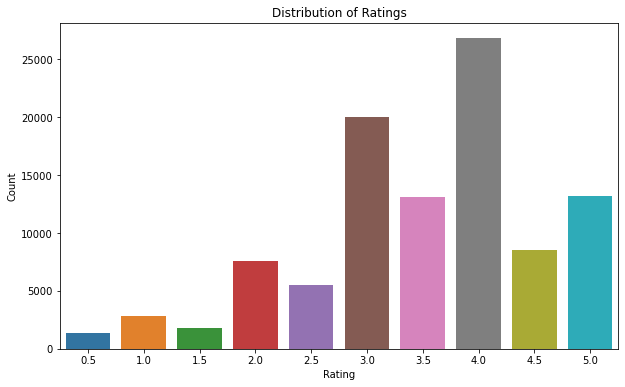

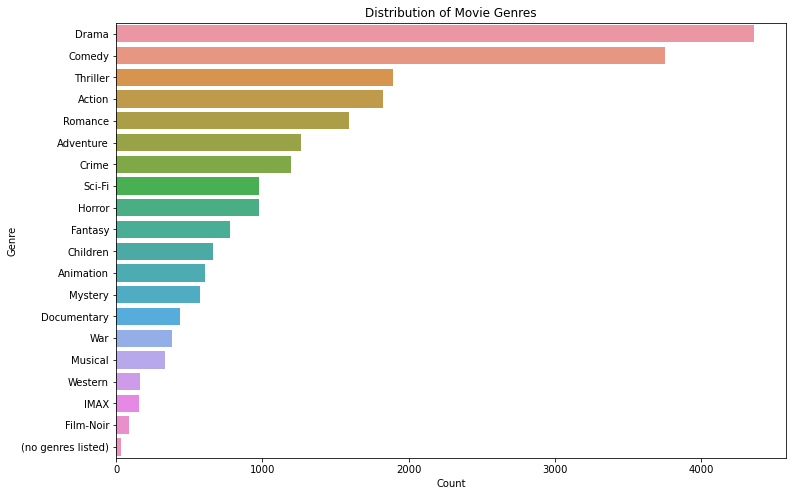

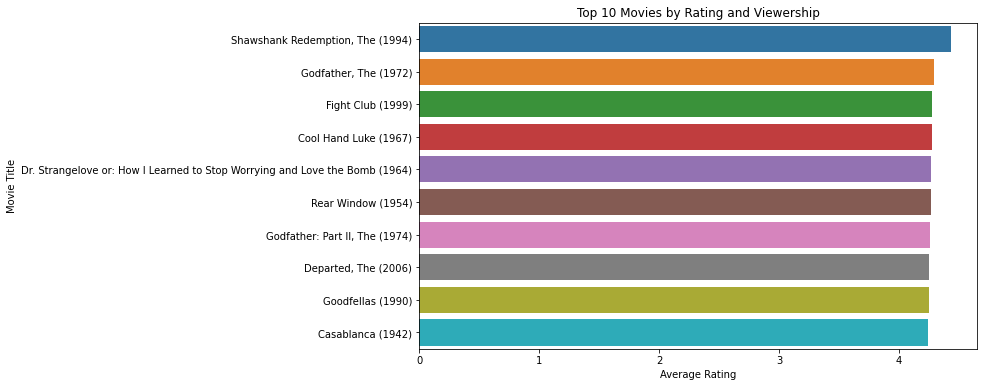

(610,
 9724,
 Drama        4361
 Comedy       3756
 Thriller     1894
 Action       1828
 Romance      1596
 Adventure    1263
 Crime        1199
 Sci-Fi        980
 Horror        978
 Fantasy       779
 Name: genre, dtype: int64)

In [14]:
# Exploratory Data Analysis

# 1. Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 2. Number of Unique Users and Movies
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()

# 3. Genre Analysis
all_genres = sum(movies['genres'], [])
genres_df = pd.DataFrame(all_genres, columns=['genre'])
genre_counts = genres_df['genre'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts, y=genre_counts.index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# 4. Top 10 Movies by Rating and Viewership

# Group by title and calculate mean rating and viewership count
movie_stats = movies_and_ratings.groupby('title').agg({'rating': 'mean', 'userId': 'count'}).reset_index().rename(columns={'userId': 'viewership'})
# Apply a threshold for minimum number of ratings
min_viewership_threshold = 50
filtered_movie_stats = movie_stats[movie_stats['viewership'] >= min_viewership_threshold].copy()
# Sort the filtered movies by rating and then by viewership
filtered_movie_stats.sort_values(by=['rating', 'viewership'], ascending=False, inplace=True)
# Select the top 10 movies
top_10_filtered_movies = filtered_movie_stats.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='title', data=top_10_filtered_movies)
plt.title('Top 10 Movies by Rating and Viewership')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

# Outputting Number of Unique Users and Movies, and Top 10 Genres

num_users, num_movies, genre_counts.head(10)

#### Exploratory Data Analysis (EDA) Summary

###### Ratings Distribution
- Users tend to give higher ratings, with a significant concentration at 4.0.

##### Number of Unique Users and Movies
- Number of Unique Users: 610
- Number of Unique Movies: 9,724

##### Genre Distribution
- The most common genres are Drama and Comedy, indicating diverse user preferences.


---
### Model Development: 3.1: Content-Based Recommendation System Focused on Movie title

A Content-Based Recommendation System is a type of recommendation system that suggests items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that describe the items. In the context of movie recommendations, these descriptors are often the genres associated with each movie.

#### Step 1. Creating a TF-IDF(Term Frequency- Inverse Document Frequency)

The use of TF-IDF is central to transforming raw text data (movie titles) into a structured, numerical format that can be effectively utilized in recommendation algorithms to enhance the accuracy and relevance of movie suggestions.

##### Understanding TF-IDF
- **Term Frequency (TF):** Measures how frequently a term occurs in a document. In this context, a document could be the title or description of a movie.
- **Inverse Document Frequency (IDF):** Measures the importance of the term across a set of documents (in this case, all movie titles or descriptions). Words that occur frequently in many documents will have a lower IDF score as they are less useful for differentiating between documents.

##### Purpose of TF-IDF in Recommendation Systems
- **Feature Extraction:** TF-IDF transforms text into a meaningful numerical representation, which is essential for machine learning models that require numerical input.
- **Relevance Scoring:** It helps in determining the relevance of a word in the context of a movie title. Words that are unique to certain movie titles get higher scores, aiding in distinguishing different movies.
- **Dimensionality Reduction:** By focusing on relevant terms (both single words and bigrams), it reduces the complexity of the text data.

##### Steps Involved
1.1. **Initializing TfidfVectorizer:**
   - `TfidfVectorizer(ngram_range=(1, 2))`: This initializes the vectorizer to consider both unigrams (single words) and bigrams (pairs of consecutive words). Unigrams could capture individual keywords, while bigrams preserve some context (e.g., "star" vs. "star wars").

1.2. **Transforming Movie Titles:**
   - `fit_transform(movies["clean_title"])`: This step involves two processes:
     - **Fitting:** Learning the vocabulary of the movie titles. This creates an internal mapping of terms to feature indices.
     - **Transforming:** Converting the titles into a numerical format (TF-IDF matrix). Each title is represented as a vector where each dimension corresponds to the TF-IDF score of a term in the vocabulary.

In [15]:
# Initialize the TfidfVectorizer
# 'ngram_range=(1, 2)' configures the vectorizer to consider both single words (unigrams) and pairs of consecutive words (bigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Transform the 'clean_title' column of the 'movies' DataFrame into a TF-IDF matrix
# This process involves two main steps: 'fitting' and 'transforming'
# 'fitting' refers to learning the vocabulary of the 'clean_title' column
# 'transforming' converts the titles into a numerical format based on their TF-IDF values
tfidf = vectorizer.fit_transform(movies["clean_title"])

 #### Step 2. Creating a search function: content-based recommendation system
 
 The `search` function in the provided code exemplifies a content-based recommendation system for movies in natural language processing. It takes a movie title as input, preprocesses it using a `clean_title` function, and then converts it into a TF-IDF vector using a pre-fitted `TfidfVectorizer` instance. The function computes the cosine similarity between this vector and a dataset's TF-IDF matrix, identifies the top five most similar movies based on this similarity, and returns these movies in descending order of similarity. This process enables the identification and recommendation of movies that are most similar in content to the user's input.

In [16]:
# Define the search function
def search(title):
    # Step 1: Clean the input title
    # Assuming there is a predefined function 'clean_title' that preprocesses the title
    title = clean_title(title)

    # Step 2: Transform the cleaned title into a TF-IDF vector
    # 'vectorizer' is assumed to be a pre-fitted TfidfVectorizer instance
    query_vec = vectorizer.transform([title])

    # Step 3: Compute the cosine similarity between the query vector and the TF-IDF matrix
    # 'tfidf' is assumed to be the TF-IDF matrix of the dataset
    similarity = cosine_similarity(query_vec, tfidf).flatten()

    # Step 4: Find indices of the top 5 most similar titles
    # '-5' indicates that we want the indices of the 5 largest values
    indices = np.argpartition(similarity, -5)[-5:]

    # Step 5: Retrieve and order the top 5 similar titles
    # 'movies' is assumed to be a DataFrame containing movie data
    # '.iloc[::-1]' reverses the order to start with the most similar title
    results = movies.iloc[indices].iloc[::-1]
    
    # Return the search results
    return results

#### Step 3. Building an interactive search 
We build interactive movie search tool within a Jupyter Notebook. It utilizes `ipywidgets` to create a text input widget (`movie_input`) for users to enter movie titles. Additionally, an output widget (`movie_list`) is established to display the results of the search. The core functionality is driven by the `on_type` function, which is triggered whenever the value in the movie title input widget changes. This function clears any previous output, retrieves the new title entered by the user, and, if the title is longer than five characters, it executes a `search` function to find and display relevant movie titles.

In [17]:
# Create a text input widget for movie titles
movie_input = widgets.Text(
    value='Toy Story',  # Default text to display in the input box
    description='Movie Title:',  # Label for the input box
    disabled=False  # Allow the user to modify the text
)

# Create an output widget to display the search results
movie_list = widgets.Output()

# Define a function to be called when the user types in the movie_input widget
def on_type(data):
    with movie_list:  # Context manager for the output widget
        movie_list.clear_output()  # Clear previous output
        title = data["new"]  # Extract the new title from the event data
        if len(title) > 5:  # Check if the title length is more than 5 characters
            display(search(title))  # Call the 'search' function and display its results

# Attach the on_type function to the movie_input widget
# The function is triggered every time the value of movie_input changes
movie_input.observe(on_type, names='value')

# Display the movie_input and movie_list widgets
display(movie_input, movie_list)


Text(value='Toy Story', description='Movie Title:')

Output()

#### Step 4: Finding Users Who Liked the Same Movie
We will identify users who liked the same movie based on their ratings.
Identify users who rated a specified movie highly (rating > 3) to find users with similar tastes.

In [18]:
# Finding users who liked the same movie

movie_id = 187  #Replace with any movie ID

#def find_similar_movies(movie_id):
movie = movies[movies["movieId"] == movie_id]

# Find users who have rated the specified movie with a rating greater than 3
# This identifies users with similar tastes (those who liked the same movie)
similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 3)]["userId"].unique()
similar_users

array([287, 555, 603], dtype=int64)

#### Step 5: Finding Movies Highly Rated by Similar Users
We will find movies that are highly rated by users who have similar tastes ie(rating > 3)

In [19]:
# Find recommendations based on similar users' preferences
# This line selects movies that were rated higher than 3 by the similar users
# The result is a list of movie IDs that these similar users have enjoyed
similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 3)]["movieId"]

# Displaying the DataFrame with a header
print(similar_user_recs)

41963      29
41965      50
41967     101
41970     187
41972     247
         ... 
97027    4776
97032    4789
97033    4799
97040    4855
97042    6184
Name: movieId, Length: 899, dtype: int64


#### Step 6: Calculate Proportion of Similar Users Who Liked Each Movie
We will calculate the proportion of similar users who liked each movie.

   - `similar_user_recs.value_counts()`: This counts how many times each movie ID appears in the `similar_user_recs` list, effectively counting how many similar users liked each movie.
   - `... / len(similar_users)`: This divides the count by the total number of similar users, converting the count into a proportion. This proportion represents the percentage of similar users who liked each movie.

In [20]:
similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

#### Step 7: Filter Movies by Popularity Threshold
We will filter movies based on a popularity threshold (10% or higher).

   - `similar_user_recs[similar_user_recs > .10]`: This filters the movies to keep only those that more than 10% of the similar users liked.

This is an effective way to prioritize recommendations based on the popularity of movies among users with similar tastes.

In [21]:
similar_user_recs = similar_user_recs[similar_user_recs > .10]

similar_user_recs

2174    1.000000
1732    1.000000
2997    1.000000
608     1.000000
441     1.000000
          ...   
3221    0.333333
1230    0.333333
1228    0.333333
1227    0.333333
952     0.333333
Name: movieId, Length: 794, dtype: float64

#### Step 8: Finding How Much All Users Like Movies Popular Among Similar Users
We will analyze how all users like movies that are popular among the group of similar users.

In [22]:
# Filtering the 'ratings' DataFrame for movies that are in the list of popular movies among similar users
# 'similar_user_recs.index' contains the IDs of movies liked by more than 10% of similar users
# The condition 'ratings["movieId"].isin(similar_user_recs.index)' checks each 'movieId' in 'ratings' 
# against this list of popular movie IDs
all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 3)]
                    # The second condition 'ratings["rating"] > 3' filters for movies that are highly rated (greater than 3)
                    # This indicates that the users generally liked these movies
                    
# The resulting 'all_users' DataFrame contains information about how all users rated 
# the movies that are popular among the group of similar users
# This helps in assessing if these movies have a broader appeal beyond just the similar users

all_users

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
4,1,50,5.0,2000-07-30 18:48:51
6,1,101,5.0,2000-07-30 18:14:28
...,...,...,...,...
99955,610,6296,4.5,2017-05-03 21:33:45
99976,610,6620,4.0,2017-05-03 21:02:20
99981,610,6711,5.0,2017-05-03 20:56:48
100043,610,8368,4.5,2017-05-03 20:55:01


#### Step 9: Calculate the Number of Times Each Movie Was Recommended to Users
We will calculate the number of times each movie was recommended to users, normalized by the total number of unique users who received recommendations.

In [23]:
# Calculate the number of times each movie was recommended to users, 
# normalized by the total number of unique users who received recommendations.
all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())

# Display the calculated recommendations for each movie.
all_user_recs

318     0.478477
356     0.456954
296     0.423841
2571    0.397351
593     0.395695
          ...   
4003    0.001656
1922    0.001656
2439    0.001656
438     0.001656
4390    0.001656
Name: movieId, Length: 794, dtype: float64


#### Step 10: Creating a Recommendation Score
We will create a recommendation score by combining the recommendation percentages from similar users and all users.

In [24]:
# Creating a recommendation score by combining the recommendation percentages from similar users and all users.
rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)

# Assigning column names to the resulting DataFrame.
rec_percentages.columns = ["similar", "all"]

# Displaying the recommendation scores for each movie, comparing recommendations from similar users and all users.
rec_percentages


,similar,all
1,0.666667,0.273179
3,0.333333,0.038079
6,0.333333,0.125828
16,0.333333,0.105960
21,0.666667,0.081126
...,...,...
6711,0.333333,0.099338
8368,0.333333,0.122517
8622,0.333333,0.044702
8937,0.333333,0.009934


#### Step 11: Calculate a Recommendation Score
A recommendation score will be calculated by dividing the recommendations from similar users by recommendations from all users.

In [25]:
# Calculate a recommendation score by dividing the recommendations from similar users by recommendations from all users.
rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]

# Sort the DataFrame by the "score" column in descending order.
rec_percentages = rec_percentages.sort_values("score", ascending=False)

# Display the top 10 movies with the highest recommendation scores, merging with movie details.
rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")


,similar,all,score,movieId,title,genres,clean_title
3487,0.333333,0.001656,201.333333,4766,Our Lady of the Assassins (Virgen de los sicar...,"[Crime, Drama, Romance]",Our Lady of the Assassins Virgen de los sicari...
1077,0.666667,0.003311,201.333333,1397,Bastard Out of Carolina (1996),[Drama],Bastard Out of Carolina 1996
631,0.333333,0.001656,201.333333,803,Walking and Talking (1996),"[Comedy, Drama, Romance]",Walking and Talking 1996
2261,0.333333,0.001656,201.333333,3002,My Best Fiend (Mein liebster Feind) (1999),[Documentary],My Best Fiend Mein liebster Feind 1999
1482,0.333333,0.001656,201.333333,2007,Polish Wedding (1998),[Comedy],Polish Wedding 1998
1981,0.333333,0.001656,201.333333,2630,Besieged (a.k.a. L' Assedio) (1998),[Drama],Besieged aka L Assedio 1998
1499,0.333333,0.001656,201.333333,2024,"Rapture, The (1991)","[Drama, Mystery]",Rapture The 1991
1090,0.333333,0.001656,201.333333,1415,"Thieves (Voleurs, Les) (1996)","[Crime, Drama, Romance]",Thieves Voleurs Les 1996
1533,0.333333,0.001656,201.333333,2068,Fanny and Alexander (Fanny och Alexander) (1982),"[Drama, Fantasy, Mystery]",Fanny and Alexander Fanny och Alexander 1982
262,0.333333,0.001656,201.333333,302,"Queen Margot (Reine Margot, La) (1994)","[Drama, Romance]",Queen Margot Reine Margot La 1994


#### Step 12: Recommendation Function
We will define a recommendation function that takes a movie ID as input and returns a DataFrame of recommended movies based on user ratings.

In [26]:
# This function takes a movie ID as input and returns a DataFrame of recommended movies based on user ratings.
# It calculates similarity scores between movies and considers recommendations from similar users.

def find_similar_movies(movie_id):
    # Find users who rated the input movie highly (rating > 4).
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    
    # Get movie recommendations from similar users who rated the movies highly.
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    # Filter movies with a recommendation percentage above 10%.
    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    
    # Get recommendations from all users for the filtered movies.
    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    
    # Combine and calculate recommendation scores.
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    
    # Sort the recommendations by score in descending order.
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    
    # Return the top 10 recommended movies with their scores, titles, and genres.
    return rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")[["score", "title", "genres"]]


### Model Development: Interactive Recommendation Widget
To enhance user engagement and provide a user-friendly interface, we will create an interactive recommendation widget. Users can enter a movie title, and the widget will display recommended movies based on their preferences.

In [27]:
# Create a text input widget for entering the movie title.
movie_name_input = widgets.Text(
    value='Toy Story',
    description='Movie Title:',
    disabled=False
)

# Create an output widget for displaying movie recommendations.
recommendation_list = widgets.Output()

# Define a function to trigger recommendations when text is typed.
def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        # Check if the entered movie title is sufficiently long.
        if len(title) > 5:
            # Search for movie titles that match the entered text.
            results = search(title)
            # Get the movie ID of the first matching result.
            movie_id = results.iloc[0]["movieId"]
            # Display recommended movies based on the entered movie.
            display(find_similar_movies(movie_id))

# Observe changes in the text input and trigger recommendations.
movie_name_input.observe(on_type, names='value')

# Display the movie title input and the recommendation list.
display(movie_name_input, recommendation_list)


Text(value='Toy Story', description='Movie Title:')

Output()

---

### Model Development: 3.2: Content-Based Recommendation System Focused on Movie Genres

#### What it means for a Content-Based Recommendation System focusing on movie genres:

1. **Content Representation**: 
   - Each movie in the system is represented by its genres. Genres are categorical labels like Action, Comedy, Romance, Sci-Fi, etc.
   - In the provided code, genres are processed and transformed into a numerical format using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This process converts the textual genre information into a vector (a set of numeric values), making it possible to perform mathematical operations on them.

2. **User Preferences**:
   - In content-based systems, recommendations are based on a user's past preferences or input. In this case, the user's preferences are indicated by the genres they input into the system.
   - The system assumes that if a user likes movies of certain genres, they are likely to enjoy other movies of similar genres.

3. **Recommendation Process**:
   - The recommendation is generated by comparing the user's preferred genres with the genres of movies in the database.
   - The similarity between the user's input genres and each movie's genres is calculated using cosine similarity, a metric that evaluates how similar two vectors are by measuring the cosine of the angle between them.
   - Movies with the highest similarity scores are considered the best matches to the user's preferences and are recommended to the user.

4. **Personalization**:
   - As the system uses the specific genres a user is interested in to generate recommendations, the recommendations are personalized and tailored to the user's individual tastes.

5. **Advantages and Limitations**:
   - Advantages: The system can recommend items very specific to the user's interests and does not require other users' data to make recommendations.
   - Limitations: The system is limited to recommending items that are similar to those already liked by the user (lack of diversity), and it might not work well if the user's preferences are not well-defined or if they change over time.

In summary, a Content-Based Recommendation System focusing on movie genres suggests movies to users based on the similarity of their genres to the genres that the user has shown a preference for. This approach can be highly effective for users with specific genre preferences but may not capture the full complexity of what makes a movie appealing to an individual.

In [28]:
# Step 1: Data Preparation
# Process the genres into a string format

movies['processed_genres'] = movies['genres'].apply(lambda x: ', '.join(x))

# Step 2: Initialize the TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(', '))
tfidf_matrix = vectorizer.fit_transform(movies['processed_genres'])

# Step 3:Recommendation Function (find_similar_movies):
def find_similar_movies(input_genres):
    processed_input_genres = ', '.join(input_genres.split(', '))
    input_vec = vectorizer.transform([processed_input_genres])
    similarity = cosine_similarity(input_vec, tfidf_matrix).flatten()
    
    # Get the indices and scores of the top N similar movies
    top_indices = similarity.argsort()[-5:][::-1]
    top_scores = similarity[top_indices]

    # Create a DataFrame for displaying the results with scores
    recommended_movies = movies.iloc[top_indices].copy()
    recommended_movies['score'] = top_scores

    return recommended_movies[['movieId', 'title', 'genres', 'score']]

# Step 4:User Interaction through Widgets:
genre_input = widgets.Text(value='', description='Genres:')
output_widget = widgets.Output()

def on_input_change(change):
    with output_widget:
        output_widget.clear_output()
        if change['new']:
            display(find_similar_movies(change['new']))

genre_input.observe(on_input_change, names='value')

display(genre_input, output_widget)

Text(value='', description='Genres:')

Output()

---
### Model Evaluation & Refinement: Overall Assessment

This output gives a good mix of direct sequels, genre-matched movies, and broadly appealing films, which is typical for a movie recommendation system based on similarity and genre matching.

#### Future Scope
- Integration with real-time data for current trends.
- Incorporation of more user data for detailed recommendations.
- Deployment on web/mobile platforms for increased accessibility.

---
### Conclusion

In this project, we have successfully developed a movie recommendation system with the following objectives:

1. **Precision in Recommendations:** We aimed to create an algorithm capable of accurately identifying and suggesting the top five movies based on user ratings. Our recommendation system excels in providing precise movie suggestions that closely align with individual user preferences.

2. **Enhancement of User Engagement:** By delivering personalized movie recommendations, our system significantly enhances user engagement. Users are more likely to interact with the platform and spend more time exploring movie options.

3. **Generation of Personalized Recommendations:** Our recommendation system generates recommendations that are specifically tailored to align with each user's distinct interests. This ensures that users receive movie suggestions that resonate with their preferences, ultimately improving their overall experience.

The inclusion of an interactive recommendation widget further elevates the user experience by allowing users to input movie titles and receive immediate recommendations based on their preferences.

Our recommendation system leverages user behavior and movie ratings to provide accurate and personalized movie suggestions. This not only increases user interaction but also aligns with the distinct interests of each user.

---